In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine


In [2]:
wine = load_wine()

In [3]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [4]:

clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(xtrain,ytrain)
rfc = rfc.fit(xtrain,ytrain)
score_c = clf.score(xtest,ytest)
score_r = clf.score(xtest,ytest)
print(score_c,score_r)

0.9444444444444444 0.9444444444444444


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [5]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [6]:
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

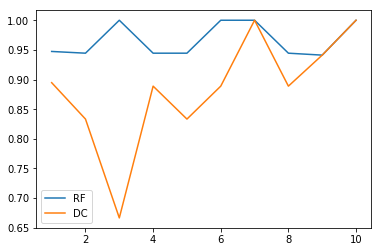

In [7]:
plt.plot(range(1,11),rfc_s,label='RF')
plt.plot(range(1,11),clf_s,label='DC')
plt.legend()
plt.show()

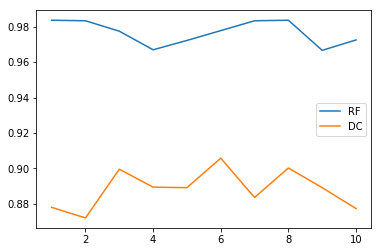

In [8]:
rfc_l = []
clf_l = []
for i in range (10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label='RF')
plt.plot(range(1,11),clf_l,label='DC')
plt.legend()
plt.show()

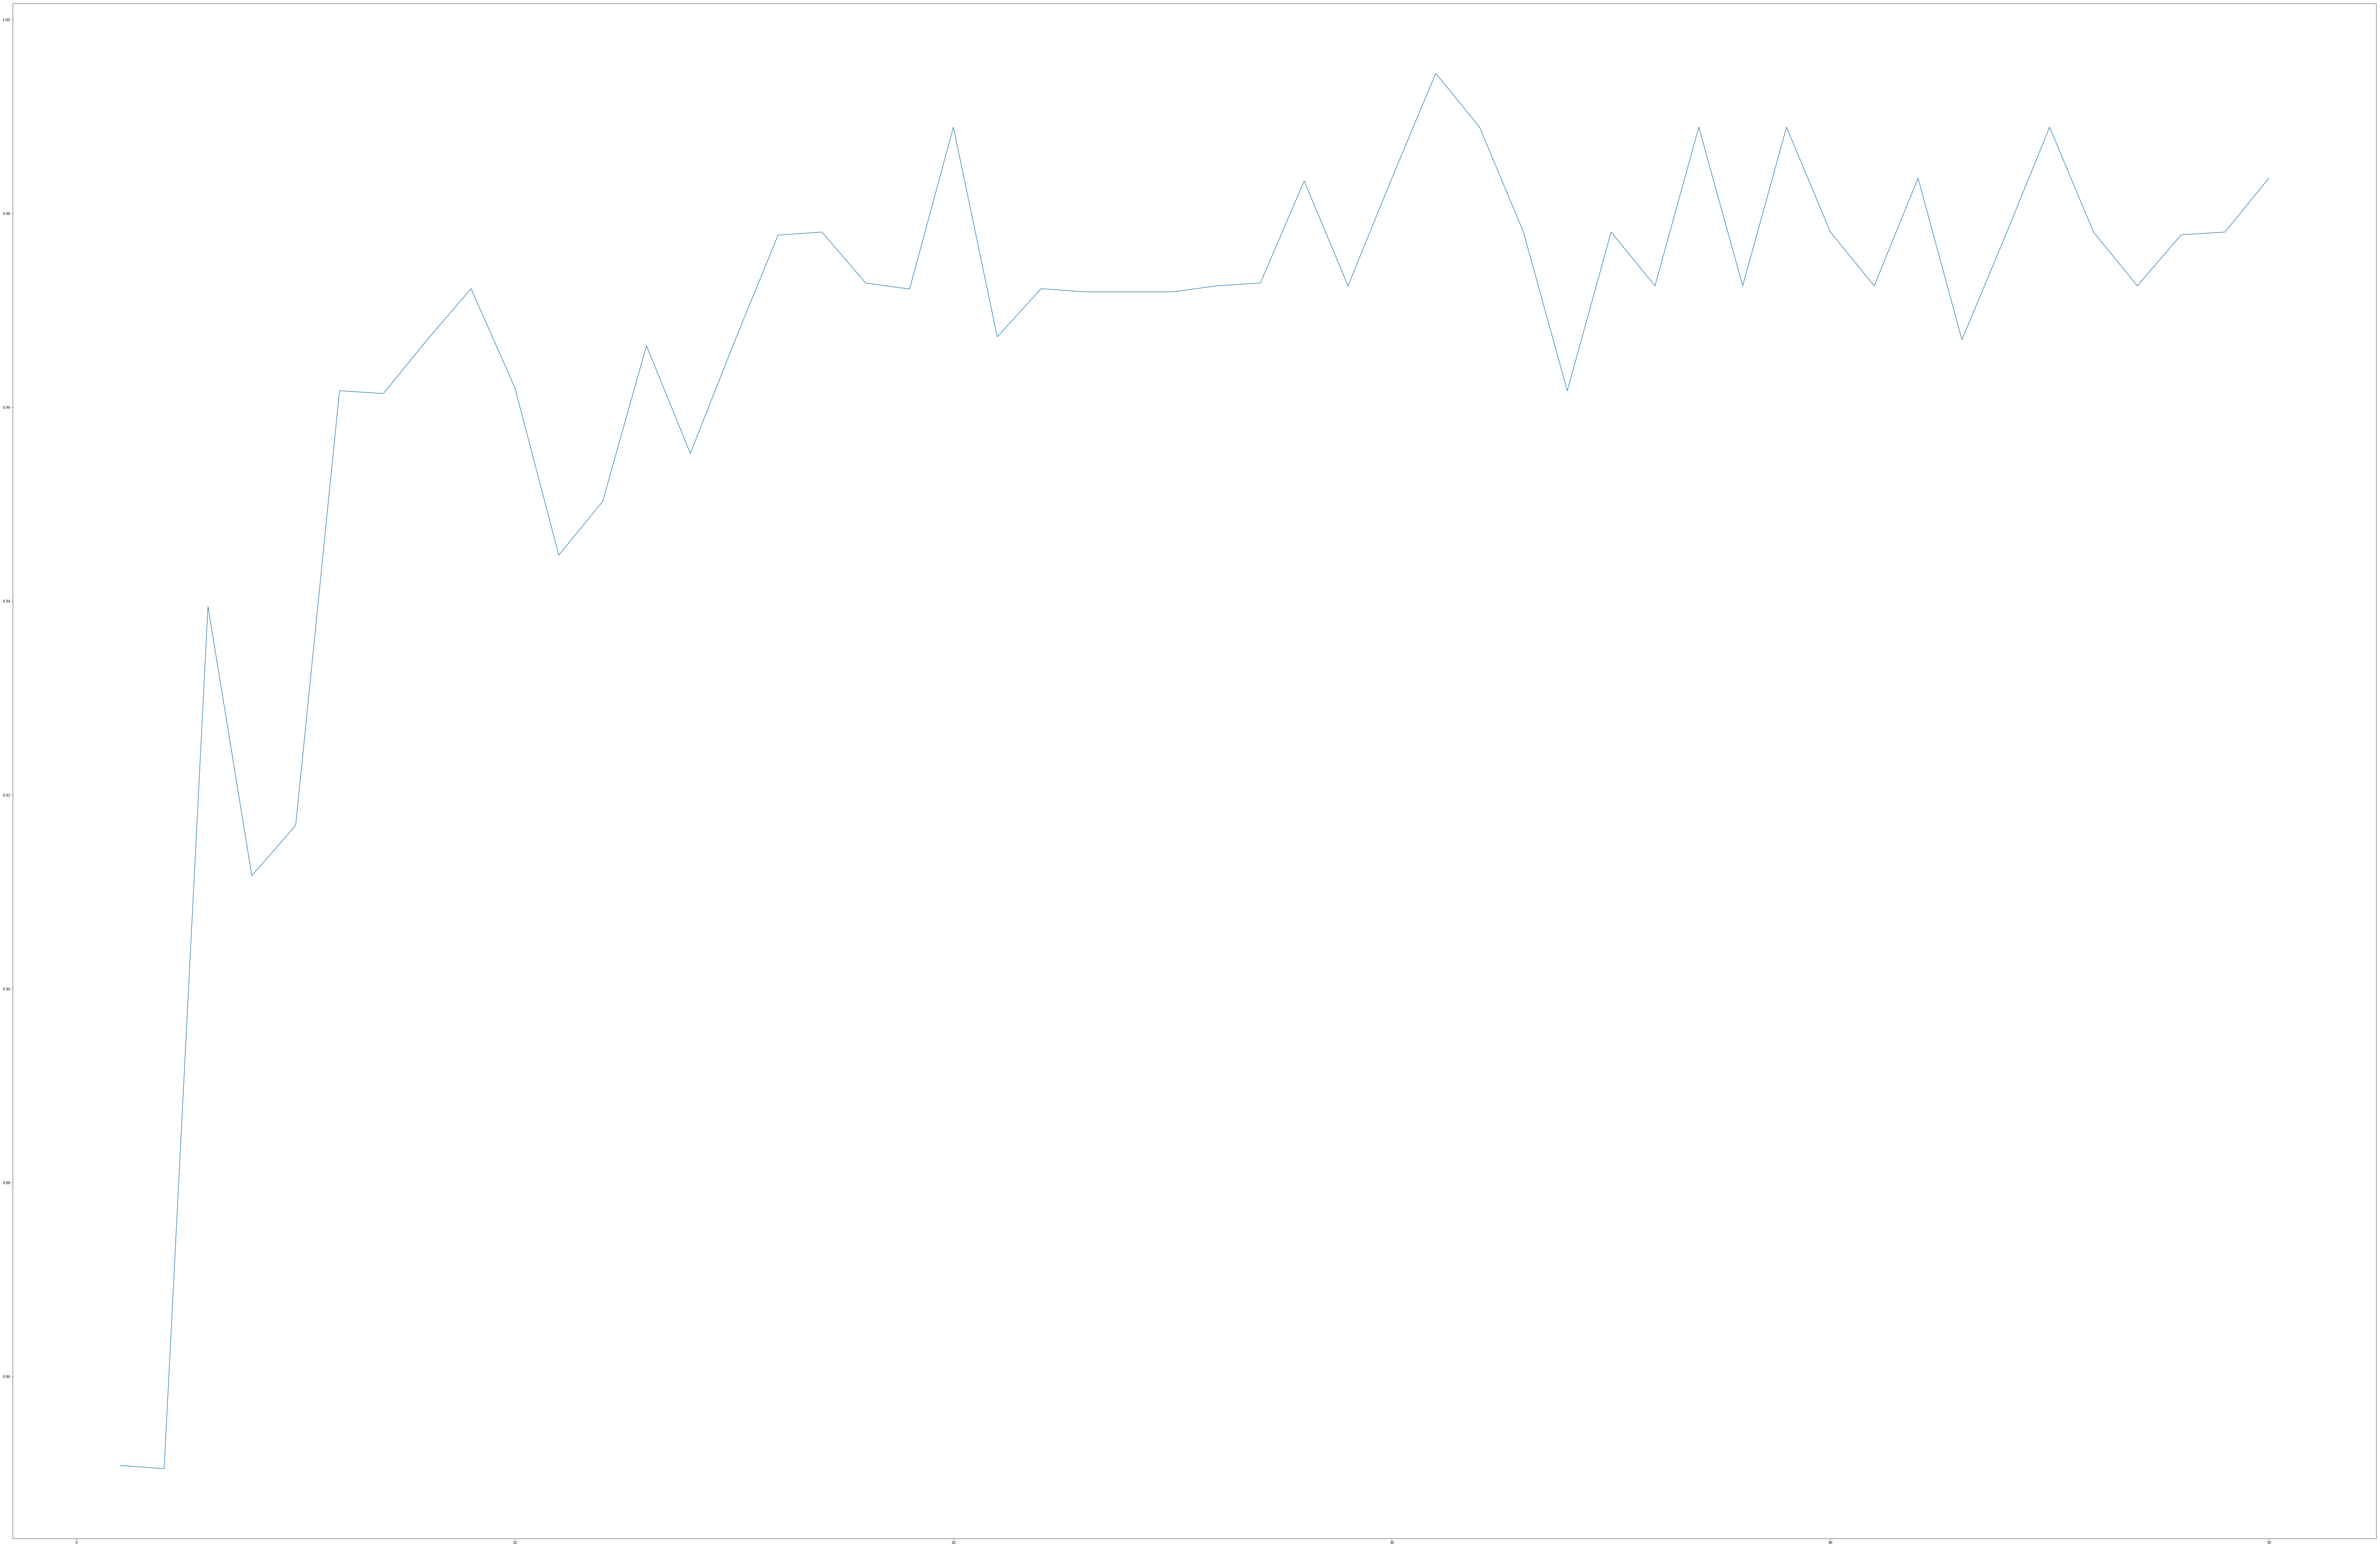

In [10]:
score_li = []
for i in range(50):
    rfc = RandomForestClassifier(n_estimators=i+1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    score_li.append(rfc_s)

plt.figure(figsize=(120,80))
plt.plot(range(1,51),score_li)
plt.xticks=range(1,51)
plt.show()

In [11]:
max(score_li)

0.9944444444444445

In [12]:
score_li.index(max(score_li))

30

In [13]:
import numpy as np
from scipy.special import comb

In [14]:
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc= RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(xtrain,ytrain)

In [17]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [18]:
rfc.estimators_[0].random_state

1872583848

In [19]:
import pandas as pd
s = pd.Series(rfc.estimators_)

In [20]:
s.apply(lambda x :x.random_state)

0     1872583848
1      794921487
2      111352301
3     1853453896
4      213298710
5     1922988331
6     1869695442
7     2081981515
8     1805465960
9     1376693511
10    1418777250
11     663257521
12     878959199
13     854108747
14     512264917
15     515183663
16    1287007039
17    2083814687
18    1146014426
19     570104212
20     520265852
21    1366773364
22     125164325
23     786090663
24     578016451
dtype: int64

In [21]:
rfc = RandomForestClassifier(n_estimators=25,oob_score=1)
rfc = rfc.fit(wine.data,wine.target)
rfc.oob_score_

0.9775280898876404

In [22]:
sorted([*zip(rfc.feature_importances_,wine.feature_names)],reverse=True)

[(0.25283180688724877, 'flavanoids'),
 (0.19418046806152722, 'proline'),
 (0.16002189532293262, 'color_intensity'),
 (0.1171494321709366, 'od280/od315_of_diluted_wines'),
 (0.07874866227644914, 'alcohol'),
 (0.06794089722256831, 'hue'),
 (0.03405881229532179, 'total_phenols'),
 (0.029387462264722785, 'magnesium'),
 (0.017436821666490125, 'ash'),
 (0.01617093142595151, 'alcalinity_of_ash'),
 (0.014221325945531257, 'malic_acid'),
 (0.011082869274726894, 'nonflavanoid_phenols'),
 (0.006768615185593007, 'proanthocyanins')]

In [23]:
rfc.apply(xtest)

array([[ 8, 11,  1, ...,  2,  8,  8],
       [ 5, 16,  4, ..., 12,  5,  4],
       [ 8, 11,  1, ...,  2,  8,  8],
       ...,
       [20, 13,  9, ...,  2, 11, 15],
       [22, 22, 11, ..., 19, 14, 16],
       [22, 22, 11, ..., 19, 14, 16]], dtype=int64)

In [24]:
rfc.predict(xtest)

array([1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2,
       1, 1, 0, 2, 2, 2, 1, 1, 0, 0])

In [25]:
rfc.predict_proba(xtest)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.08, 0.88, 0.04],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.08, 0.92, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.76, 0.24, 0.  ],
       [0.  , 0.96, 0.04],
       [0.08, 0.92, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.04, 0.96],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.84, 0.16],
       [0.92, 0.08, 0.  ],
 

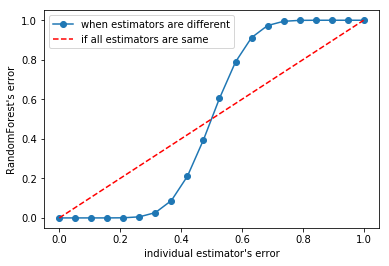

In [26]:

import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()


In [27]:
np.linspace(0,1,20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [28]:
np.linspace(0,1,21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [29]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10)
               ,##scoring = "neg_mean_squared_error")
sorted(sklearn.metrics.SCORERS)


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


In [31]:
data = load_boston()
data.data.shape

(506, 13)

In [33]:
X_full,y_full = data.data,data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [36]:
missing_features = rng.randint(0,n_features,n_missing_sample)
missing_samples = rng.randint(0,n_samples,n_missing_sample)
X_missing = x_full.copy()
y_missing = y_full.copy()
X_missing[missing_samples,missing_features] = np.nan

NameError: name 'n_missing_sample' is not defined

In [37]:
X_missing = pd.DataFrame(X_missing)
X_missing.isnull().sum(axis=0).sum()

NameError: name 'X_missing' is not defined

In [38]:
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
x_missing_mean = imp_mean.fit_transform(X_missing)

NameError: name 'X_missing' is not defined

In [ ]:
pd.DataFrame(x_missing_mean).info()

In [ ]:
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)
pd.DataFrame(X_missing_0).info()
imp_0.statistics_ .shape

In [ ]:
X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
sortindex

In [ ]:
for i in sortindex:
    df = X_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    inputer= SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
    df = inputer.fit_transform(df)
    Y_train = fillc[fillc.notna()]
    Y_test = fillc[fillc.isna()]
    X_train = df[Y_train.index,:]
    X_test = df[Y_test.index,:]
    rfc =  RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(X_train, Y_train)
    Ypredict = rfc.predict(X_test)
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

In [ ]:
X_missing_reg.head()

In [ ]:
x=[x_full,x_missing_mean,X_missing_0,X_missing_reg]
mse =[]
for i in x:
    rfc= RandomForestRegressor(n_estimators=100,random_state=0)
    score = cross_val_score(rfc,i,y_full,scoring='neg_mean_squared_error',cv=5).mean()
    mse.append(score*-1)

In [ ]:
mse

In [ ]:
x_labels = ['Full data',
            'Zero Imputation',
            'Mean Imputation',
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
             right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()



In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [42]:
data = load_breast_cancer()


In [44]:
rfc =RandomForestClassifier(n_estimators=100,random_state=42)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9632443176907787

In [73]:
score_l = []
for i in range(20,30,1):
    rfc = RandomForestClassifier(n_estimators=i+1,random_state=42)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    score_l.append(score)
print(max(score_l),[*range(20,30)][score_l.index(max(score_l))]+1)


0.9632745657246564 21


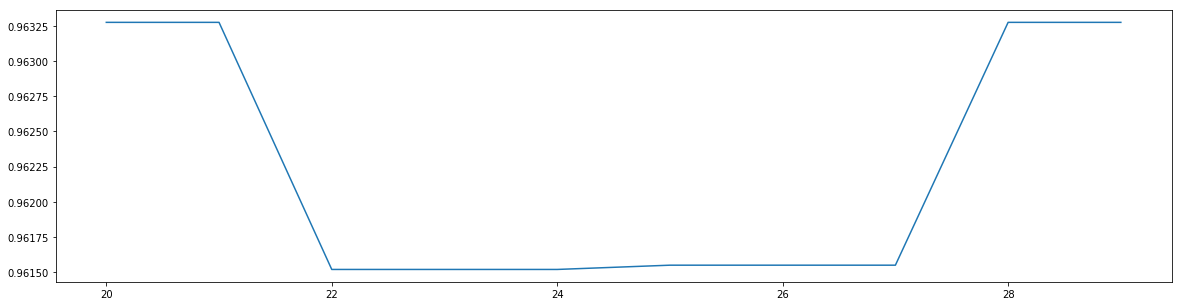

In [68]:
plt.figure(figsize=[20,5])
plt.plot(range(20,30,1),score_l)
plt.show()

In [104]:
param_grid = {'max_depth':[7],
              'max_leaf_nodes':[25],
              'criterion':['entropy'],
              'min_samples_split':[8],
              'min_samples_leaf':[1],
              'max_features':[5]
             }            
rfc = RandomForestClassifier(n_estimators=21,random_state=42)
GS= GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [7], 'max_leaf_nodes': [25], 'criterion': ['entropy'], 'min_samples_split': [8], 'min_samples_leaf': [1], 'max_features': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
GS.best_params_


{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 5,
 'max_leaf_nodes': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 8}

In [106]:
GS.best_score_

0.9648506151142355